In [1]:
%load_ext autoreload
%autoreload 2

# Explorateur de données

## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from CinePred.data.importing import *

In [18]:
from CinePred.new_model import *

## Import le dataframe

In [4]:
df = import_data(link="../raw_data/IMDb_movies.csv")

In [6]:
df[df['title'].str.contains('Doorway')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
876,tt0020836,The Doorway to Hell,The Doorway to Hell,1930,1930-10-18,"Crime, Drama",78,USA,English,Archie Mayo,...,"Lew Ayres, Dorothy Mathews, Leon Janney, Rober...","Despite his efforts to go straight, a young ga...",6.5,947,$ 240000,NaN,NaN,NaN,30.0,14.0
37532,tt0235353,The Doorway,The Doorway,2000,2000-10-24,"Horror, Thriller",91,Ireland,English,Michael B. Druxman,...,"Roy Scheider, Lauren Woodland, Christian Harmo...",An easy paying job turns into a fight to the d...,3.9,415,NaN,NaN,NaN,NaN,23.0,16.0
66274,tt2321269,Doorway to Heaven,Doorway to Heaven,2012,2012-12-11,Family,98,USA,English,Craig Clyde,...,"Kaden Billin, Mark Brocksmith, Annalaya Brown,...","After her grandfather dies, a girl discovers a...",5.6,417,NaN,NaN,NaN,NaN,11.0,2.0
81215,tt6793280,The Devil's Doorway,The Devil's Doorway,2018,2019-02-28,Horror,76,"Ireland, UK",English,Aislinn Clarke,...,"Lalor Roddy, Ciaran Flynn, Helena Bereen, Laur...","In the fall of 1960, Father Thomas Riley and F...",5.2,2571,$ 1,NaN,$ 516660,48.0,48.0,45.0


In [22]:
df = preproc(df,path='../raw_data/cat_acteur.csv')

In [23]:
df

,year,duration,budget,worlwide_gross_income,shifted,date_sin,date_cos,Crime,Adventure,Animation,...,Family,Thriller,Musical,Comedy,Mystery,Western,Romance,Nb_actuals_movie_directors_company,Nb_actuals_movie_directors,Nb_actuals_movie_directors_writer
0,2018,76,0.013124,5.713205,0,0.866025,5.000000e-01,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2019,79,0.013124,5.175909,0,0.866025,5.000000e-01,0,0,0,...,0,0,0,1,0,0,0,1,1,1
2,2019,100,0.013124,5.432633,0,-0.500000,-8.660254e-01,0,0,0,...,0,0,0,1,0,0,0,1,1,1
3,2017,149,0.023604,6.061420,0,-0.866025,-5.000000e-01,0,0,0,...,0,1,0,0,0,0,0,1,1,1
4,2016,95,0.032759,5.587708,0,0.866025,-5.000000e-01,0,0,0,...,0,0,0,1,0,0,0,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12019,2019,181,8.564574,9.446817,16,0.866025,-5.000000e-01,0,1,0,...,0,0,0,0,0,0,0,12,6,8
12020,1963,192,8.570714,7.761761,1,0.500000,8.660254e-01,0,0,0,...,0,0,0,0,0,0,0,18,5,1
12021,2007,169,8.573417,8.982722,6,0.500000,-8.660254e-01,0,1,0,...,0,0,0,0,0,0,0,63,7,3
12022,1959,126,8.834959,4.239325,0,1.000000,6.123234e-17,1,0,0,...,0,0,0,1,0,0,0,1,1,1


In [16]:
movie_dic = {}
for i in range(7000,8000):
    movie_dic[df['title'].iloc[0:df.shape[0]][i]] = {'Actors' : df['actors'].iloc[0:df.shape[0]][i],
                                                     'Country' : df['country'].iloc[0:df.shape[0]][i],
                                                    'imdb_title_id' : df['imdb_title_id'].iloc[0:df.shape[0]][i],
                                                    'Income' : (df['worlwide_gross_income'].iloc[0:df.shape[0]][i])}

In [17]:
movie_dic

{'Rotaie insanguinate': {'Actors': 'Randolph Scott, Janis Carter, Jerome Courtland, Peter M. Thompson, John Archer, Warner Anderson, Roy Roberts, Billy House, Olin Howland, Allene Roberts, Jock Mahoney, Harry Cording, Sven Hugo Borg, Frank Ferguson, Irving Pichel',
  'Country': 'USA',
  'imdb_title_id': 'tt0043992',
  'Income': nan},
 "Saturday's Hero": {'Actors': 'John Derek, Donna Reed, Sidney Blackmer, Alexander Knox, Elliott Lewis, Otto Hulett, Howard St. John, Aldo Ray, Alvin Baldock, Wilbur Robertson, Charles Barnes, Bill Martin, Mickey Knox, Sandro Giglio, Tito Vuolo',
  'Country': 'USA',
  'imdb_title_id': 'tt0043994',
  'Income': nan},
 'The Scarf': {'Actors': 'John Ireland, Mercedes McCambridge, James Barton, Emlyn Williams, Lloyd Gough, Basil Ruysdael, David Bauer',
  'Country': 'USA',
  'imdb_title_id': 'tt0043998',
  'Income': nan},
 'Scarlet Thread': {'Actors': 'Kathleen Byron, Laurence Harvey, Sydney Tafler, Dora Bryan, Renee Kelly, Arthur Hill, Cyril Chamberlain, Hylton

In [5]:
print('----- import Data -----')
df = import_data("../raw_data/IMDb movies.csv")

print('----- keep columns -----')
df = keep_columns(df,
                  column_names=[
                      'imdb_title_id', 'title', 'year', 'date_published',
                      'genre', 'duration', 'country', 'director', 'writer',
                      'production_company', 'actors', 'budget',
                      'worlwide_gross_income'
                  ])

print('----- remove na rows -----')
df = remove_na_rows(df)

print('----- convert budget -----')
df['budget'] = convert_budget_column(df[['budget']])

# print('----- reduce column type -----')
# df['actors'] = reduce_column_type(df[['actors']], nb_max=3)

print('----- convert income column -----')
df['worlwide_gross_income'] = convert_income(df[['worlwide_gross_income']])

print('----- convert to int -----')
df['year'] = convert_to_int(df[['year']])
df['duration'] = convert_to_int(df[['duration']])

print('----- convert to date -----')
df['date_published'] = convert_to_date(df[['date_published']])

print('----- reset index -----')
df = reset_index(df)

# print('----- log transform -----')
# df['worlwide_gross_income'] = log_transformation(
#     df[['worlwide_gross_income']])

# print('----- data_shape -----')

----- import Data -----
../raw_data/IMDb movies.csv


/tmp/ipykernel_2068/3978816577.py:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = import_data("../raw_data/IMDb movies.csv")


----- keep columns -----
----- remove na rows -----
----- convert budget -----
../raw_data/currencies.csv
----- convert income column -----
----- convert to int -----
----- convert to date -----
----- reset index -----


In [6]:
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",18000,8811
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",27887,4272
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",800000,9183673
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",250000,26916
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",351000,11233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,"Dileep, Anu Sithara, Siddique, Suraj Venjaramo...",402722,105932
12566,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,"Manesh Krishnan, Gopika Anil, Salim Kumar, Dev...",402722,2568
12567,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,Animation,100,Malaysia,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...","Hjh. Ainon Ariff, Nur Naquyah bt Burhanuddin",Les' Copaque Production,"Asyiela Putri Bt Azhar, Mohd Amir Asyraf Bin M...",4729812,83857
12568,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,"Karthi, Narain, Ramana, George Maryan, Harish ...",3221779,524061


In [7]:
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Marilyn Monroe, Tony Curtis, Jack Lemmon",18000,3.945025
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Dean Martin, Kim Novak, Ray Walston",27887,3.630631
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Barbara Dennek, Jacques Tati, Rita Maiden",800000,6.963016
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Tony Curtis, Henry Fonda, George Kennedy",250000,4.430011
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Steve McQueen, Dustin Hoffman, Victor Jory",351000,4.050496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,NaN,402722,5.025027
12566,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,NaN,402722,3.409595
12567,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,Animation,100,Malaysia,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...","Hjh. Ainon Ariff, Nur Naquyah bt Burhanuddin",Les' Copaque Production,NaN,4729812,4.923539
12568,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,NaN,3221779,5.719382


In [36]:
df[df['title'].str.contains("Titanic")]

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
2668,tt0120338,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada",James Cameron,James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",200000000,2195169869


# Plot

In [11]:
# liste_acteurs = []
# liste_complete = []
# for i in range(df.shape[0]):
#     liste_acteurs.append((df['actors'][i].split(", ")))
#     for name in liste_acteurs[i]:
#         liste_complete.append(name)

AttributeError: 'float' object has no attribute 'split'

In [12]:
# actors_df = pd.DataFrame(liste_complete)

In [13]:
# liste_acteurs

## Nombre de films par acteurs

In [14]:
# pd.DataFrame(actors_df.value_counts().head(100))

NameError: name 'actors_df' is not defined

### Répartition des films par acteurs (100 premiers)

In [15]:
# actors_df.value_counts()

## Budget over revenue

<AxesSubplot:xlabel='budget', ylabel='worlwide_gross_income'>

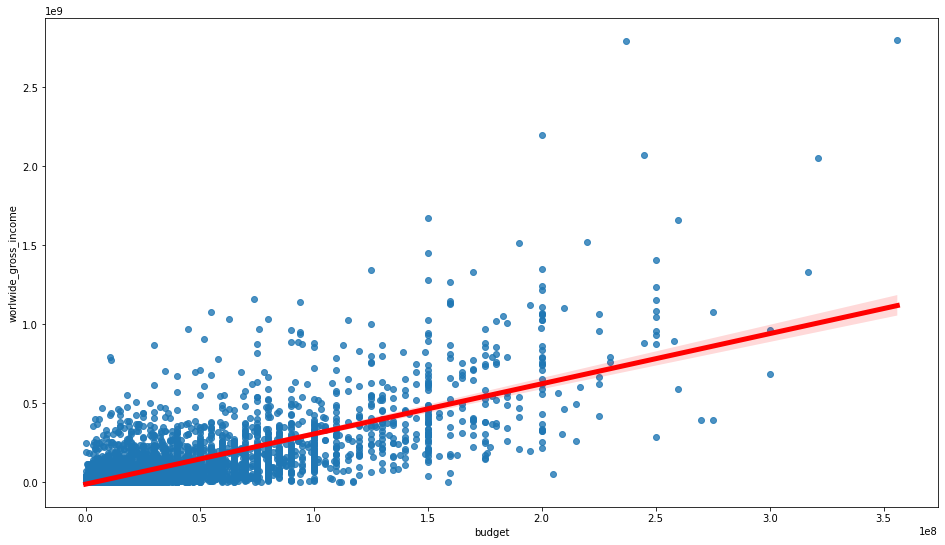

In [37]:
fig = plt.figure(figsize=(16,9))
sns.regplot(x = "budget", y = "worlwide_gross_income",data=df, line_kws={"lw":5, "color":"red"})

## Répartition par mois

In [38]:
df_revenue_per_month = df.groupby(by="Month_published").sum()[['worlwide_gross_income']].reset_index()
df_budget_per_month = df.groupby(by="Month_published").sum()[['budget']].reset_index()

KeyError: 'Month_published'

In [ ]:
df_budget_revenue = df_revenue_per_month.merge(right =df_budget_per_month, how='right', on ="Month_published")

In [18]:
df_budget_revenue

NameError: name 'df_budget_revenue' is not defined

In [19]:
plt.figure(figsize=(16,9))
sns.barplot(x = df_budget_revenue['Month_published'] ,y = df_budget_revenue["worlwide_gross_income"])

NameError: name 'df_budget_revenue' is not defined

<Figure size 1152x648 with 0 Axes>

In [20]:
plt.figure(figsize=(16,9))

sns.histplot(df['Month_published'], bins=12)

KeyError: 'Month_published'

<Figure size 1152x648 with 0 Axes>

# Features

## Films par acteurs

In [ ]:
len(liste_acteurs)

In [ ]:
liste_complete = list(dict.fromkeys(liste_complete))

In [ ]:
df_actor_title = df[['actors','title','year','Month_published','budget','worlwide_gross_income']]
df_actor_title['actors'].str.split(', ')

# Merge des deux dataframe

In [3]:
acteurs_df = pd.read_csv('../raw_data/cat_acteur.csv')

In [4]:
acteurs_df

,Unnamed: 0,title,shifted,acteur_name,year,month,budget,income,ratio
0,0,#Selfieparty,0,Ksenia Mishina,2016,3,100000.0,179458,1.794580
1,1,#Selfieparty,0,Pavlo Li,2016,3,100000.0,179458,1.794580
2,2,#Selfieparty,0,Olena Lavrenyuk,2016,3,100000.0,179458,1.794580
3,3,'Chi chi' de ai,0,Dee Hsu,2017,5,1500000.0,4013033,2.675355
4,4,'Chi chi' de ai,0,Kim Scar,2017,5,1500000.0,4013033,2.675355
...,...,...,...,...,...,...,...,...,...
37096,37096,Öldür beni,0,Burak Sarimola,2009,2,63657.0,19142,0.300705
37097,37097,Öldür beni,0,Erol Alpsoykan,2009,2,63657.0,19142,0.300705
37098,37098,Únos,0,Ludovít Cittel,2017,3,1504620.0,1633936,1.085946
37099,37099,Únos,0,Gabriela Dolná,2017,3,1504620.0,1633936,1.085946


In [5]:
acteurs_df['ratio'] = acteurs_df['income']/acteurs_df['budget']

In [42]:
# acteurs_df_cat = acteurs_df.loc[(acteurs_df['ratio']>=5) & (acteurs_df['budget'] >= 100_000_000)]

In [43]:
# len(acteurs_df_cat['acteur_name'].unique())

159

In [44]:
# acteurs_df_cat[['acteur_name','budget']].groupby(by='acteur_name').sum().sort_values(by="budget", ascending=False).head(159)

,budget
acteur_name,
Robert Downey Jr.,1.522000e+09
Mark Ruffalo,1.147000e+09
Chris Evans,5.760000e+08
Chris Hemsworth,5.710000e+08
Tom Hanks,5.250000e+08
...,...
Tom Hardy,1.000000e+08
George Clooney,1.000000e+08
Fionn Whitehead,1.000000e+08


In [45]:
# top_tier_actor_df = acteurs_df.groupby(by="acteur_name").sum()[['budget']].sort_values("budget", ascending=False)

In [46]:
# top_tier_actor_df

,budget
acteur_name,
Mac,4.043730e+09
Johnny Depp,3.407500e+09
Robert Downey Jr.,3.175500e+09
Leon,2.895191e+09
Will Smith,2.653100e+09
...,...
Lalor Roddy,1.000000e+00
Helena Bereen,1.000000e+00
Daniel Furlan,9.082063e-01


In [6]:
def connupaconnu(X, ratio = 3):
    if (X['budget'] >= 100_000_000) & (X['ratio'] >= 3):
        return 1
    return 0

In [7]:
acteurs_df.sort_values('year', ascending=True, inplace= True)

In [8]:
acteurs_df['connu'] = acteurs_df.apply(connupaconnu, axis = 1)

In [9]:
acteurs_df['nbsucces'] = acteurs_df['connu']

In [10]:
new_df = acteurs_df

In [11]:
new_df['nbsuccess'] = acteurs_df.groupby(by  ='acteur_name')['connu'].cumsum(axis = 0)

In [12]:
new_df = new_df.sort_values('year', ascending=True)

In [13]:
new_df.drop(columns='nbsucces', inplace = True)

In [14]:
new_df['connu2'] = new_df['nbsuccess'].apply(lambda x : 1 if x >=1 else 0)

In [15]:
new_df.drop(columns="connu", inplace = True)

In [16]:
new_df.rename(columns={"connu2" : "connu"}, inplace=True)

In [18]:
new_df[new_df['acteur_name'].str.contains('Leonardo DiCaprio')]

,Unnamed: 0,title,shifted,acteur_name,year,month,budget,income,ratio,nbsuccess,connu
4834,4834,Buon compleanno Mr. Grape,0,Leonardo DiCaprio,1993,3,11000000.0,10032765,0.912070,0,0
27162,27162,Ritorno dal nulla,0,Leonardo DiCaprio,1995,4,2000000.0,2381087,1.190543,0,0
25533,25533,Poeti dall'inferno,0,Leonardo DiCaprio,1995,8,8000000.0,340139,0.042517,0,0
27335,27335,Romeo + Giulietta di William Shakespeare,0,Leonardo DiCaprio,1996,2,14500000.0,151842560,10.471901,0,0
19141,19141,La stanza di Marvin,0,Leonardo DiCaprio,1996,4,23000000.0,12803305,0.556665,0,0
33410,33410,Titanic,0,Leonardo DiCaprio,1997,1,200000000.0,2195169869,10.975849,1,1
18555,18555,La maschera di ferro,2,Leonardo DiCaprio,1998,3,35000000.0,182968902,5.227683,1,1
31135,31135,The Beach,2,Leonardo DiCaprio,2000,2,50000000.0,144056873,2.881137,1,1
10535,10535,Gangs of New York,2,Leonardo DiCaprio,2002,1,100000000.0,193772504,1.937725,1,1
26005,26005,Prova a prendermi,2,Leonardo DiCaprio,2002,1,52000000.0,352114312,6.771429,1,1


In [63]:
new_df['totalsuccess'] = new_df.groupby(by = 'title').cumsum()['shifted']

In [64]:
new_df

,Unnamed: 0,title,shifted,acteur_name,year,month,budget,income,ratio,nbsuccess,connu,totalsuccess
13749,13749,Il gabinetto del dottor Caligari,0,Conrad Veidt,1920,2,1.800000e+04,8811,0.489500,0,0,0
13748,13748,Il gabinetto del dottor Caligari,0,Werner Krauss,1920,2,1.800000e+04,8811,0.489500,0,0,0
13750,13750,Il gabinetto del dottor Caligari,0,Friedrich Feher,1920,2,1.800000e+04,8811,0.489500,0,0,0
21464,21464,Markens grøde,0,Karen Poulsen,1921,12,2.926274e+04,4272,0.145988,0,0,0
21463,21463,Markens grøde,0,Amund Rydland,1921,12,2.926274e+04,4272,0.145988,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17805,17805,La Marca del Demonio,0,Eduardo Noriega,2020,1,9.000000e+05,396624,0.440693,0,0,0
9712,9712,Figli,0,Paola Cortellesi,2020,1,2.314800e+06,3691574,1.594770,0,0,0
10015,10015,Force of Nature,0,Emile Hirsch,2020,6,2.300000e+07,537474,0.023368,0,0,0
32875,32875,The Tax Collector,3,Shia LaBeouf,2020,8,3.000000e+07,942666,0.031422,3,1,9


In [65]:
total_success = pd.DataFrame(new_df.groupby(['title'], sort = False)['shifted'].max())

In [66]:
total_success.reset_index(inplace = True)

In [67]:
total_success

,title,shifted
0,Il gabinetto del dottor Caligari,0
1,Markens grøde,0
2,I quattro cavalieri dell'Apocalisse,0
3,Il monello,0
4,La donna di Parigi,0
...,...,...
11885,Force of Nature,0
11886,Figli,0
11887,Gretel e Hansel,2
11888,10 jours sans maman,0


In [68]:
df = df.merge(right=total_success, on='title', how = "right")

In [69]:
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income,shifted
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",18000,8811,0
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",27887,4272,0
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",800000,9183673,0
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",250000,26916,0
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",351000,11233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12021,tt10308928,Force of Nature,2020,2020-06-30,"Action, Drama",91,USA,Michael Polish,Cory M. Miller,Emmett/Furla/Oasis Films (EFO Films),"Emile Hirsch, Mel Gibson, David Zayas, Kate Bo...",23000000,537474,0
12022,tt10937670,Figli,2020,2020-01-23,Comedy,97,Italy,Giuseppe Bonito,Mattia Torre,Wildside,"Valerio Mastandrea, Paola Cortellesi, Stefano ...",2241574,3691574,0
12023,tt9086228,Gretel e Hansel,2020,2020-08-19,"Fantasy, Horror, Mystery",87,"Canada, USA, Ireland, South Africa",Oz Perkins,Rob Hayes,Orion Pictures,"Sophia Lillis, Samuel Leakey, Alice Krige, Jes...",5000000,21966625,2
12024,tt10251538,10 jours sans maman,2020,2020-02-19,Comedy,104,France,Ludovic Bernard,"Ariel Winograd, Mariano Vera",Soyouz Films,"Aure Atika, Franck Dubosc, Alexis Michalik, Hé...",1452363,10186502,0


## Recherche par titre de films

In [70]:
total_success[total_success['title'].str.contains('Fast')]

,title,shifted
2784,Fast Food,0
3531,Fast and Furious,0
4048,2 Fast 2 Furious,0
5035,The Fast and the Furious: Tokyo Drift,0
7099,Fast & Furious - Solo parti originali,0
7457,Faster,0
7791,Fast & Furious 5,0
9019,Fast & Furious 6,2
9797,Fast & Furious 7,5
11023,Fast & Furious 8,8


## Recherche par nom d'acteur

In [74]:
df[['actors','title','shifted']][df['actors'].str.contains('Leonardo DiCaprio')]

,actors,title,shifted
378,"Lisa Adam, Frank Aldridge, Amitabh Bachchan, S...",Il grande Gatsby,0
1870,"Sara Gilbert, Drew Barrymore, Tom Skerritt, Ch...",La mia peggiore amica,0
1927,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",Buon compleanno Mr. Grape,0
2224,"Sharon Stone, Gene Hackman, Russell Crowe, Leo...",Pronti a morire,0
2275,"Leonardo DiCaprio, Lorraine Bracco, Marilyn So...",Ritorno dal nulla,0
2319,"Leonardo DiCaprio, David Thewlis, Romane Bohri...",Poeti dall'inferno,0
2337,"Leonardo DiCaprio, Claire Danes, John Leguizam...",Romeo + Giulietta di William Shakespeare,0
2355,"Meryl Streep, Leonardo DiCaprio, Diane Keaton,...",La stanza di Marvin,0
2535,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",Titanic,0
2753,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",La maschera di ferro,2


# testing

In [7]:
df

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income
0,tt0010323,Il gabinetto del dottor Caligari,1920,1920-02-27,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,"Carl Mayer, Hans Janowitz",Decla-Bioscop AG,"Werner Krauss, Conrad Veidt, Friedrich Feher, ...",18000,8811
1,tt0011440,Markens grøde,1921,1921-12-02,Drama,107,Norway,Gunnar Sommerfeldt,"Knut Hamsun, Gunnar Sommerfeldt",Christiana Film,"Amund Rydland, Karen Poulsen, Ragna Wettergree...",27887,4272
2,tt0012190,I quattro cavalieri dell'Apocalisse,1921,1923-04-16,"Drama, Romance, War",150,USA,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis",Metro Pictures Corporation,"Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",800000,9183673
3,tt0012349,Il monello,1921,1923-11-26,"Comedy, Drama, Family",68,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Carl Miller, Edna Purviance, Jackie Coogan, Ch...",250000,26916
4,tt0014624,La donna di Parigi,1923,1927-06-06,"Drama, Romance",82,USA,Charles Chaplin,Charles Chaplin,Charles Chaplin Productions,"Edna Purviance, Clarence Geldart, Carl Miller,...",351000,11233
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12565,tt9878242,Subharathri,2019,2019-07-06,"Drama, Romance",130,India,Vyasan K.P.,"Vyasan K.P., Vyasan K.P.",Abaam Movies,"Dileep, Anu Sithara, Siddique, Suraj Venjaramo...",402722,105932
12566,tt9886872,Munthiri Monchan,2019,2019-12-06,"Comedy, Romance",130,India,Vijith Nambiar,"Manu Gopal, Meharali Poilungal Ismail",Vishvas Movies,"Manesh Krishnan, Gopika Anil, Salim Kumar, Dev...",402722,2568
12567,tt9894394,Upin & Ipin: Keris Siamang Tunggal,2019,2019-03-21,Animation,100,Malaysia,"Adam Bin Amiruddin, Syed Nurfaiz Khalid bin Sy...","Hjh. Ainon Ariff, Nur Naquyah bt Burhanuddin",Les' Copaque Production,"Asyiela Putri Bt Azhar, Mohd Amir Asyraf Bin M...",4729812,83857
12568,tt9900782,Kaithi,2019,2019-10-25,"Action, Thriller",145,India,Lokesh Kanagaraj,"Lokesh Kanagaraj, Pon Parthiban",Dream Warrior Pictures,"Karthi, Narain, Ramana, George Maryan, Harish ...",3221779,524061


In [9]:
df1 = add_success_movies_per_actors(df)

In [10]:
df1[df1['actors'].str.contains('Leonardo DiCaprio')]

,imdb_title_id,title,year,date_published,genre,duration,country,director,writer,production_company,actors,budget,worlwide_gross_income,shifted
378,tt1343092,Il grande Gatsby,2013,2013-05-16,"Drama, Romance",143,"Australia, USA",Baz Luhrmann,"Baz Luhrmann, Craig Pearce",Warner Bros.,"Lisa Adam, Frank Aldridge, Amitabh Bachchan, S...",105000000,353641895,0
1870,tt0105156,La mia peggiore amica,1992,1992-05-08,"Drama, Thriller",90,USA,Katt Shea,"Melissa Goddard, Andy Ruben",New Line Cinema,"Sara Gilbert, Drew Barrymore, Tom Skerritt, Ch...",3000000,1829804,0
1927,tt0108550,Buon compleanno Mr. Grape,1993,1994-03-04,Drama,118,USA,Lasse Hallström,"Peter Hedges, Peter Hedges",Paramount Pictures,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",11000000,10032765,0
2224,tt0114214,Pronti a morire,1995,1995-05-26,"Action, Romance, Thriller",107,"Japan, USA",Sam Raimi,Simon Moore,TriStar Pictures,"Sharon Stone, Gene Hackman, Russell Crowe, Leo...",32000000,18636537,0
2275,tt0112461,Ritorno dal nulla,1995,1995-04-21,"Biography, Crime, Drama",102,USA,Scott Kalvert,"Jim Carroll, Bryan Goluboff",New Line Cinema,"Leonardo DiCaprio, Lorraine Bracco, Marilyn So...",2000000,2381087,0
2319,tt0114702,Poeti dall'inferno,1995,1996-08-23,"Biography, Drama, Romance",111,"UK, France, Belgium",Agnieszka Holland,Christopher Hampton,FIT Productions,"Leonardo DiCaprio, David Thewlis, Romane Bohri...",8000000,340139,0
2337,tt0117509,Romeo + Giulietta di William Shakespeare,1996,1997-02-28,"Drama, Romance",120,"USA, Mexico, Australia, Canada",Baz Luhrmann,"William Shakespeare, Craig Pearce",Bazmark Films,"Leonardo DiCaprio, Claire Danes, John Leguizam...",14500000,151842560,0
2355,tt0116999,La stanza di Marvin,1996,1997-04-24,Drama,98,USA,Jerry Zaks,"Scott McPherson, Scott McPherson",Scott Rudin Productions,"Meryl Streep, Leonardo DiCaprio, Diane Keaton,...",23000000,12803305,0
2535,tt0120338,Titanic,1997,1998-01-16,"Drama, Romance",194,"USA, Mexico, Australia, Canada",James Cameron,James Cameron,Twentieth Century Fox,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",200000000,2195169869,0
2753,tt0120744,La maschera di ferro,1998,1998-03-27,"Action, Adventure, Drama",132,"France, USA",Randall Wallace,"Alexandre Dumas, Randall Wallace",United Artists,"Leonardo DiCaprio, Jeremy Irons, John Malkovic...",35000000,182968902,2


In [11]:
df1.columns

Index(['imdb_title_id', 'title', 'year', 'date_published', 'genre', 'duration',
       'country', 'director', 'writer', 'production_company', 'actors',
       'budget', 'worlwide_gross_income', 'shifted'],
      dtype='object')